# Работа 1

### Построить схему и численное решение для уравнения Лапласа (при $ S = 0 $) внутри квадратной области $ 0 \leq x \leq 1 $, $ 0 \leq y \leq 1 $. Использовать один из следующих итерационных методов: Якоби, Гаусс-Зейдель или SOR.  
### Граничные условия представлены на рисунке, более подробная информация по реализации содержится в файле [Lecture-2-2017.pdf](https://drive.google.com/file/d/1j05F6IkJgbnxEAizzUfEtr5cw633zx_v/view) (в разделе Steady State).

#### Уравнение Лапласа:

$$
\frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} = S
$$

#### Итерация методом Якоби:

$$
f_{i,j}^{\alpha+1} = \frac{1}{4} \left( f_{i+1,j}^{\alpha} + f_{i-1,j}^{\alpha} + f_{i,j-1}^{\alpha} + f_{i,j+1}^{\alpha} - h^2 S_{i,j} \right)
\tag{1}
$$

<div align="center"> <img src="img/image.png" alt="" /> </div>

In [90]:
# Подключаем нужные библиотеки
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Сетка
x_0, y_0 = 0.0, 0.0
x_1, y_1 = 1.0, 1.0

x_len = abs(x_1 - x_0)
y_len = abs(y_1 - y_0)

N = 50  # Количество узлов
h = x_len / (N - 1)  # Шаг сетки

# Создание сетки
x = np.linspace(x_0, x_1, N)
y = np.linspace(y_0, y_1, N)

In [ ]:
f = np.zeros((N, N))

quarter = N // 4


def set_boundary_conditions(f: np.ndarray) -> None:
    # Верхняя и нижняя стенки: f'y = 0 (неймановские условия)
    f[0, :] = f[1, :]  # Нижняя стенка
    f[-1, :] = f[-2, :]  # Верхняя стенка

    # Левая стенка: f'x = 0
    f[:, 0] = f[:, 1]

    # Правая стенка: смешанные условия Дирихле
    f[:, -1] = 1.0
    f[-quarter:, -1] = 0.0  # Верхняя четверть: f = 0
    f[:quarter, -1] = 0.0  # Нижняя четверть: f = 0


set_boundary_conditions(f)

In [93]:
iterations_max = 10000
accuracy = 1e-6


def gauss_seidel_method(f: np.ndarray) -> np.ndarray:
    f_new = f.copy()

    for iter in range(iterations_max):
        max_diff = 0.0

        for i in range(1, N - 1):
            for j in range(1, N - 1):
                f_new[i, j] = 0.25 * (
                    f_new[i + 1, j]
                    + f_new[i - 1, j]
                    + f_new[i, j + 1]
                    + f_new[i, j - 1]
                )

                diff = abs(f_new[i, j] - f[i, j])
                max_diff = max(max_diff, diff)

        f[:, :] = f_new[:, :]

        set_boundary_conditions(f)

        if max_diff < accuracy:
            print(f"Сходимость достигнута на итерации {iter}")
            break

    return f

Сходимость достигнута на итерации 1743


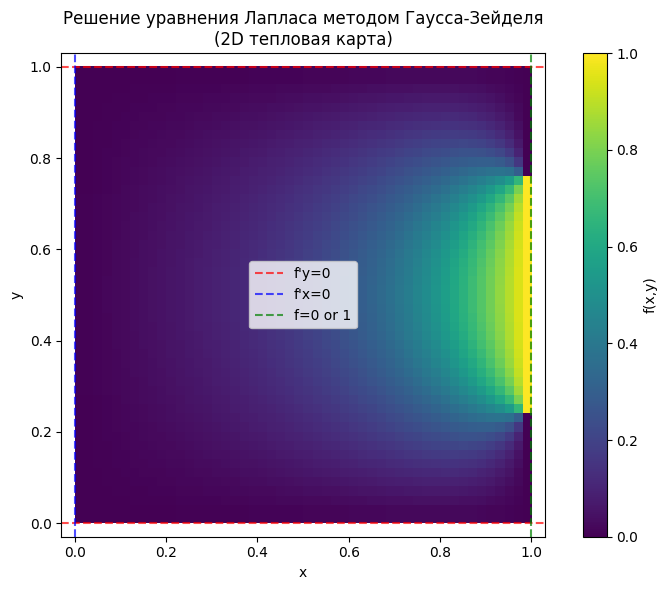

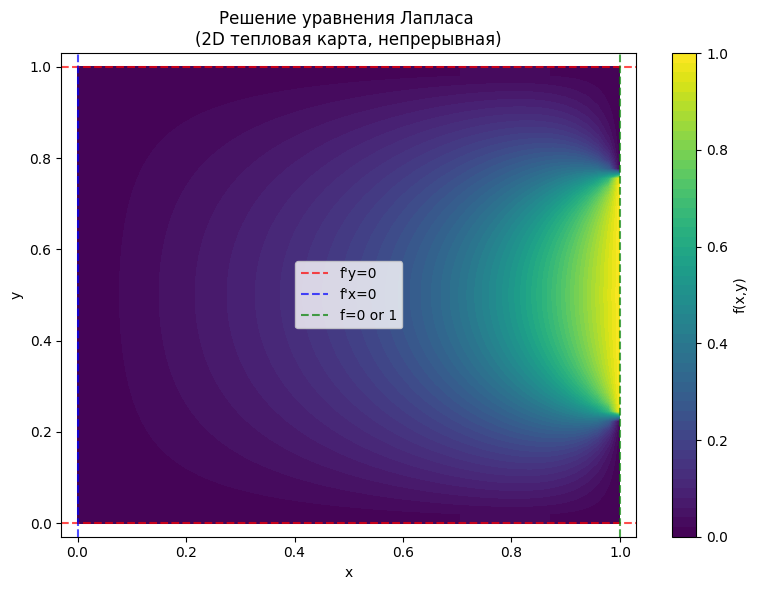

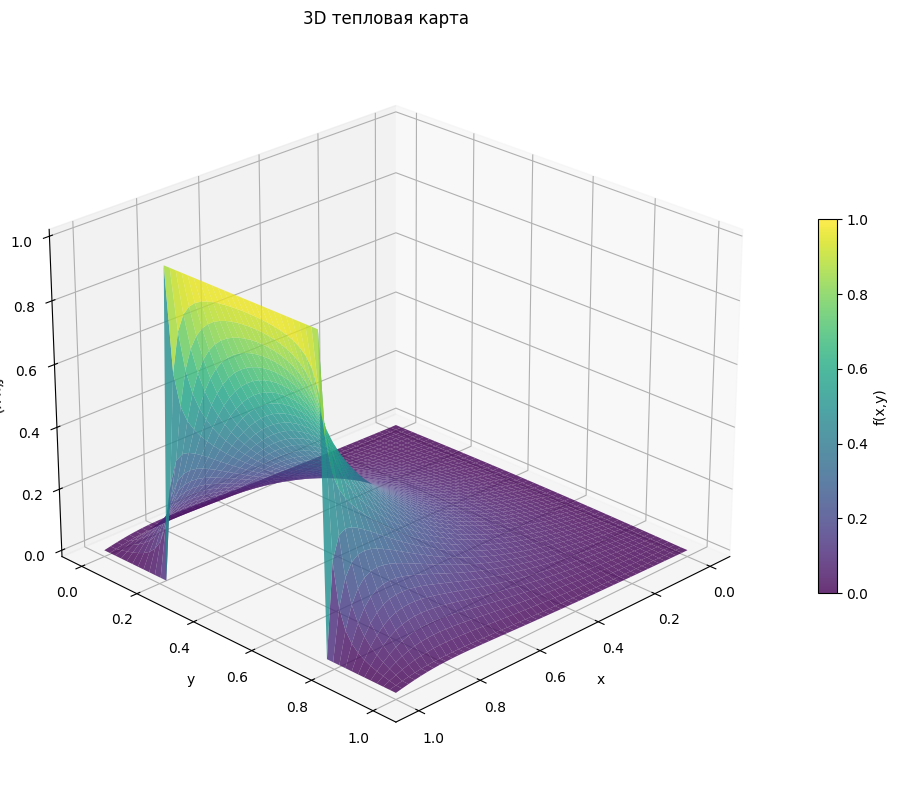

In [94]:
f = gauss_seidel_method(f)

# График 1: дискретная 2D тепловая карта
plt.figure(figsize=(8, 6))
im = plt.imshow(f, extent=(0, 1, 0, 1), origin="lower", cmap="viridis", vmin=0, vmax=1)
cbar = plt.colorbar(im, label="f(x,y)")
cbar.set_ticks(np.arange(0, 1.1, 0.2))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Решение уравнения Лапласа методом Гаусса-Зейделя\n(2D тепловая карта)")

# Строим граничные условия
plt.axhline(y=0, color="red", linestyle="--", alpha=0.7, label="f'y=0")
plt.axhline(y=1, color="red", linestyle="--", alpha=0.7)
plt.axvline(x=0, color="blue", linestyle="--", alpha=0.7, label="f'x=0")
plt.axvline(x=1, color="green", linestyle="--", alpha=0.7, label="f=0 or 1")

plt.xlim(-0.03, 1.03)
plt.ylim(-0.03, 1.03)

plt.legend()
plt.tight_layout()
plt.show()

# График 2: непрерывная 2D тепловая карта
plt.figure(figsize=(8, 6))
X, Y = np.meshgrid(x, y)
contour = plt.contourf(X, Y, f, levels=50, cmap="viridis", vmin=0, vmax=1)
cbar = plt.colorbar(contour, label="f(x,y)")
cbar.set_ticks(np.arange(0, 1.1, 0.2))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Решение уравнения Лапласа \n(2D тепловая карта, непрерывная)")

# Строим граничные условия
plt.axhline(y=0, color="red", linestyle="--", alpha=0.7, label="f'y=0")
plt.axhline(y=1, color="red", linestyle="--", alpha=0.7)
plt.axvline(x=0, color="blue", linestyle="--", alpha=0.7, label="f'x=0")
plt.axvline(x=1, color="green", linestyle="--", alpha=0.7, label="f=0 or 1")

plt.xlim(-0.03, 1.03)
plt.ylim(-0.03, 1.03)

plt.legend()
plt.tight_layout()
plt.show()

# График 3: 3D поверхность
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(
    X, Y, f, alpha=0.8, cmap="viridis", linewidth=0, antialiased=True, vmin=0, vmax=1
)

# Оптимальный угол обзора для наилучшего вида поверхности
ax.view_init(elev=25, azim=45)

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")
ax.set_title("3D тепловая карта")

ax.grid(True, alpha=0.3)

cbar = plt.colorbar(surf, ax=ax, shrink=0.5, aspect=20, label="f(x,y)")
cbar.set_ticks(np.arange(0, 1.1, 0.2))

plt.tight_layout()
plt.show()